In [69]:
import utils
import constants

In [70]:
import pandas as pd
import numpy as np

In [71]:
df_cat = pd.read_csv("MCO_categorias_importantes.csv")

df_cat

,cod_category,name_category,total_items,parti_num_items,cum_parti_num_items
0,MCO1574,Hogar y Muebles,4305565,5.430839,5.430839
1,MCO1132,Juegos y Juguetes,2136362,2.694708,8.125547
2,MCO1246,Belleza y Cuidado Personal,2059954,2.598330,10.723877
3,MCO1747,Accesorios para Vehículos,1596663,2.013956,12.737833
4,MCO1430,Ropa y Accesorios,1431321,1.805402,14.543235
...,...,...,...,...,...
503,MCO429452,Soportes para Carros,22268,0.028088,79.872895
504,MCO158236,Luces,22267,0.028087,79.900981
505,MCO164712,De Pared,22255,0.028071,79.929053
506,MCO179914,Otros,22209,0.028013,79.957066


In [72]:
# for cat in df_cat["cod_category"].unique():
#     print("[INFO]: Categoria:" + "-"*10 + cat)
#     size = 100
    
#     utils.lote_items(
#         category=cat,
#         size=size, 
#         site="MCO",
#         file_name="Data_Modelo/items_modelo_{category}_{size}.csv".format(
#             category=cat,
#             size=size
#         ),
#         discount=False
#     )
#     print("-"*20)

In [73]:
df = pd.read_csv("Data_Modelo/data_set.csv")

df

,id,site_id,title,price,sale_price,currency_id,available_quantity,sold_quantity,buying_mode,listing_type_id,...,seller_address_latitude,seller_address_longitude,NUM_ATTRIBUTEs,BRAND,ITEM_CONDITION,MODEL,num_tags,best_seller_candidate,loyalty_discount_eligible,good_quality_picture
0,MCO446165009,MCO,"Bomba De Succión Al Vacío Para Baños, Cañerías...",47405,NaN,COP,1,250,buy_it_now,gold_special,...,NaN,NaN,5,Energy Plus,Nuevo,402400,7,0,1,1
1,MCO472182494,MCO,Base Pata Escritorio Milano Negra,98000,NaN,COP,1,50,buy_it_now,gold_special,...,NaN,NaN,3,Vince,Nuevo,MILANO,5,0,1,1
2,MCO503609295,MCO,Velas Pebetero 32und Luz Decoración Aluminio M...,18990,NaN,COP,1,25,buy_it_now,gold_special,...,NaN,NaN,3,candeles,Nuevo,x32,4,0,0,1
3,MCO466957428,MCO,Repuesto Cono Exprimidor Black And Decker Cj ...,27000,NaN,COP,1,250,buy_it_now,gold_pro,...,NaN,NaN,3,Genérica,Nuevo,Cj631,5,0,1,1
4,MCO591610344,MCO,Set X3 Recipientes Porta Comida Hermetico Vidr...,59900,NaN,COP,1,100,buy_it_now,gold_special,...,NaN,NaN,5,NaN,Nuevo,x3,6,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12820,MCO577238346,MCO,Camara Robotica Inalambrica Wifi 3 Antenas 360...,89900,NaN,COP,1,500,buy_it_now,gold_special,...,NaN,NaN,4,NaN,Nuevo,3 antenas,6,0,1,1
12821,MCO534970001,MCO,Fuente De Voltaje 12 V 1 A Para Cctv Hikvision...,3471,NaN,COP,100,500,buy_it_now,gold_pro,...,NaN,NaN,6,Genérica,Nuevo,1200v 1A,7,1,1,1
12822,MCO502633990,MCO,Camara Ip Wifi Vision Nocturna 2mpx 3 Antenas...,84500,NaN,COP,100,500,buy_it_now,gold_special,...,NaN,NaN,6,Vision,Nuevo,camara ip,6,1,0,1
12823,MCO562589688,MCO,Caja Fuerte Digital Karson Gran Capacidad 16 L...,199900,NaN,COP,1,500,buy_it_now,gold_special,...,NaN,NaN,5,Karson,Nuevo,Tamaño grande,5,0,0,1


# Limpieza de datos

## Columnas de Ids

In [74]:
cols_id = [
    x for x in df.columns if("id" in x)&("best_seller_candidate"!=x)
]

cols_id

['id',
 'site_id',
 'currency_id',
 'listing_type_id',
 'thumbnail_id',
 'category_id',
 'official_store_id',
 'domain_id',
 'catalog_product_id',
 'use_thumbnail_id',
 'winner_item_id',
 'seller_id',
 'prices_id',
 'installments_currency_id',
 'address_state_id',
 'address_city_id',
 'seller_address_id']

In [75]:
df.drop(
    columns=cols_id,
    inplace=True
)

## Nulos

In [76]:
df_nulos = pd.DataFrame(df.isnull().sum()).reset_index(drop=False)
df_nulos.columns = ["variables", "num_nulos"]
df_nulos["perc_nulos"] = 100*df_nulos["num_nulos"]/df.shape[0]
df_nulos

,variables,num_nulos,perc_nulos
0,title,0,0.000000
1,price,0,0.000000
2,sale_price,12825,100.000000
3,available_quantity,0,0.000000
4,sold_quantity,0,0.000000
5,buying_mode,0,0.000000
6,stop_time,0,0.000000
7,condition,0,0.000000
8,permalink,0,0.000000
9,thumbnail,0,0.000000


In [77]:
df_nulos[
    df_nulos["perc_nulos"] > 0
].sort_values(
    by="perc_nulos", 
    ascending=False
)

,variables,num_nulos,perc_nulos
2,sale_price,12825,100.000000
38,seller_address_address_line,12825,100.000000
13,offer_score,12825,100.000000
14,offer_share,12825,100.000000
15,match_score,12825,100.000000
16,melicoin,12825,100.000000
44,seller_address_longitude,12825,100.000000
43,seller_address_latitude,12825,100.000000
39,seller_address_zip_code,12825,100.000000
37,seller_address_comment,12825,100.000000


### Columnas completamente vacias 

In [78]:
cols_100_nulas = df_nulos.loc[
    df_nulos["perc_nulos"] >95, "variables"
].unique()

df.drop(
    columns=cols_100_nulas,
    inplace=True
)

cols_100_nulas

array(['sale_price', 'offer_score', 'offer_share', 'match_score',
       'melicoin', 'seller_permalink', 'seller_registration_date',
       'seller_tags', 'seller_address_comment',
       'seller_address_address_line', 'seller_address_zip_code',
       'seller_address_latitude', 'seller_address_longitude'],
      dtype=object)

In [79]:
df_nulos_evaluar = df_nulos[
    (df_nulos["perc_nulos"]>0)&(df_nulos["perc_nulos"]<95)
].sort_values(
    by="perc_nulos", 
    ascending=False
)

df_nulos_evaluar

,variables,num_nulos,perc_nulos
11,original_price,10590,82.573099
48,MODEL,4364,34.027290
46,BRAND,2243,17.489279
27,installments_quantity,200,1.559454
28,installments_amount,200,1.559454
29,installments_rate,200,1.559454
35,shipping_logistic_type,200,1.559454
47,ITEM_CONDITION,2,0.015595


In [80]:
cols_nulos_evaluar = df_nulos_evaluar["variables"].unique()

cols_nulos_evaluar

array(['original_price', 'MODEL', 'BRAND', 'installments_quantity',
       'installments_amount', 'installments_rate',
       'shipping_logistic_type', 'ITEM_CONDITION'], dtype=object)

original_price

In [81]:
df["tiene_descuento"] = 1

df.loc[
    df["original_price"].isnull(),
    "tiene_descuento"
] = 0

df.drop(
    columns=["original_price"], 
    inplace=True
)

MODEL

In [82]:
df_models = pd.DataFrame(
    df["MODEL"].value_counts()
).reset_index()

df_models.columns = ["Modelo", "frecuencia"]

df_models.sort_values(
    by=["frecuencia"], 
    ascending=False
)

,Modelo,frecuencia
0,2021,147
1,2020,118
2,Luz Blanca,24
3,1,22
4,360,20
...,...,...
2822,Gazebo,1
2823,Silla Grande Porta Vaso,1
2824,2 Personas,1
2825,homecollection,1


In [83]:
df["MODEL_bool"] = df["MODEL"].map(
    lambda x : 0 if pd.isnull(x) else 1
)

In [84]:
df[["MODEL", "MODEL_bool"]]

,MODEL,MODEL_bool
0,402400,1
1,MILANO,1
2,x32,1
3,Cj631,1
4,x3,1
...,...,...
12820,3 antenas,1
12821,1200v 1A,1
12822,camara ip,1
12823,Tamaño grande,1


In [85]:
df.drop(
    columns=["MODEL"], 
    inplace=True
)

In [86]:
cols_nulos_evaluar

array(['original_price', 'MODEL', 'BRAND', 'installments_quantity',
       'installments_amount', 'installments_rate',
       'shipping_logistic_type', 'ITEM_CONDITION'], dtype=object)

BRAND

In [87]:
df_models = pd.DataFrame(
    df["BRAND"].value_counts()
).reset_index()

df_models.columns = ["Brand", "frecuencia"]

df_models.sort_values(
    by=["frecuencia"], 
    ascending=False
)

,Brand,frecuencia
0,Genérica,424
1,Generico,131
2,Xiaomi,69
3,Truper,62
4,Medellín Electrónica,60
...,...,...
2306,ECOM.WORLD,1
2305,Fenbo,1
2304,GAMES,1
2303,Tutu Love,1


In [88]:
df["BRAND_bool"] = df["BRAND"].map(
    lambda x : 0 if pd.isnull(x) else 1
)

In [89]:
df[["BRAND", "BRAND_bool"]]

,BRAND,BRAND_bool
0,Energy Plus,1
1,Vince,1
2,candeles,1
3,Genérica,1
4,NaN,0
...,...,...
12820,NaN,0
12821,Genérica,1
12822,Vision,1
12823,Karson,1


In [90]:
df.drop(
    columns=["BRAND"], 
    inplace=True
)

In [91]:
cols_nulos_evaluar

array(['original_price', 'MODEL', 'BRAND', 'installments_quantity',
       'installments_amount', 'installments_rate',
       'shipping_logistic_type', 'ITEM_CONDITION'], dtype=object)

### Filas con nulos

In [92]:
cols_for_rows = ['installments_quantity',
       'installments_amount', 'installments_rate',
       'shipping_logistic_type', 'ITEM_CONDITION']

In [93]:
df_rows_nulos = pd.DataFrame(
    df[cols_for_rows].isnull().sum(axis=1)
)

df_rows_nulos.columns = ["fila_nulo"]

df_rows_nulos.sort_values(
    by=["fila_nulo"], 
    ascending=False
)

,fila_nulo
11839,4
8642,4
8551,4
8552,4
8553,4
...,...
4278,0
4279,0
4280,0
4281,0


In [94]:
indices_con_nulos = df_rows_nulos[df_rows_nulos["fila_nulo"] > 0].index

df.drop(
    index=indices_con_nulos,
    inplace=True
)

indices_con_nulos

Int64Index([ 7300,  7301,  7302,  7303,  7304,  7305,  7306,  7307,  7308,
             7309,
            ...
            11866, 11867, 11868, 11869, 11870, 11871, 11872, 11873, 11874,
            12159],
           dtype='int64', length=202)

In [95]:
df.isnull().sum()

title                           0
price                           0
available_quantity              0
sold_quantity                   0
buying_mode                     0
stop_time                       0
condition                       0
permalink                       0
thumbnail                       0
accepts_mercadopago             0
order_backend                   0
seller_car_dealer               0
seller_real_estate_agency       0
prices_prices                   0
prices_presentation             0
prices_payment_method_prices    0
prices_reference_prices         0
prices_purchase_discounts       0
installments_quantity           0
installments_amount             0
installments_rate               0
address_state_name              0
address_city_name               0
shipping_free_shipping          0
shipping_mode                   0
shipping_tags                   0
shipping_logistic_type          0
shipping_store_pick_up          0
seller_address_country_name     0
seller_address

## Columnas con dict o list

In [96]:
cols_complex_type = constants.KEYS_LIST_TYPES + list(constants.KEYS_JSON_TYPES.keys())

[x for x in df.columns if x in cols_complex_type]

[]

In [97]:
special_type_cols = []
for col in df.columns:
    value = str(df.loc[~df[col].isnull(), col][0])
    if (("[" in value)|("{" in value)):
        print(col)
        print(value)
        special_type_cols.append(col)

prices_prices
[{'id': '20', 'type': 'standard', 'amount': 49900, 'regular_amount': None, 'currency_id': 'COP', 'last_updated': '2021-07-29T01:09:44Z', 'conditions': {'context_restrictions': [], 'start_time': None, 'end_time': None, 'eligible': True}, 'exchange_rate_context': 'DEFAULT', 'metadata': {}}, {'id': '67', 'type': 'promotion', 'amount': 47405, 'regular_amount': 49900, 'currency_id': 'COP', 'last_updated': '2022-02-16T21:55:11Z', 'conditions': {'context_restrictions': ['channel_marketplace'], 'start_time': '2022-02-16T05:00:00Z', 'end_time': '2022-02-23T04:59:59Z', 'eligible': True}, 'exchange_rate_context': 'DEFAULT', 'metadata': {'promotion_id': '1633377-MCO446165009', 'promotion_type': 'custom'}}]
prices_presentation
{'display_currency': 'COP'}
prices_payment_method_prices
[]
prices_reference_prices
[]
prices_purchase_discounts
[]
shipping_tags
['fulfillment', 'self_service_in']


In [98]:
df.drop(
    columns=special_type_cols,
    inplace=True
)
special_type_cols

['prices_prices',
 'prices_presentation',
 'prices_payment_method_prices',
 'prices_reference_prices',
 'prices_purchase_discounts',
 'shipping_tags']

# Evaluacion de variables 

### Enlaces

In [99]:
cols_enlaces = ["permalink", "thumbnail"]

df.drop(
    columns=cols_enlaces,
    inplace=True
)

cols_enlaces

['permalink', 'thumbnail']

### Titulo

In [100]:
df["title"]

0        Bomba De Succión Al Vacío Para Baños, Cañerías...
1                        Base Pata Escritorio Milano Negra
2        Velas Pebetero 32und Luz Decoración Aluminio M...
3        Repuesto Cono  Exprimidor Black And Decker Cj ...
4        Set X3 Recipientes Porta Comida Hermetico Vidr...
                               ...                        
12820    Camara Robotica Inalambrica Wifi 3 Antenas 360...
12821    Fuente De Voltaje 12 V 1 A Para Cctv Hikvision...
12822    Camara Ip Wifi Vision Nocturna  2mpx 3 Antenas...
12823    Caja Fuerte Digital Karson Gran Capacidad 16 L...
12824    Cámara De Seguridad Tp-link Tapo C200 V1 Tapo ...
Name: title, Length: 12623, dtype: object

In [101]:
def num_words(x:str):
    return len(x.split(" "))

In [102]:
num_words("Bomba De Succión Al Vacío Para Baños")

7

In [103]:
df["num_words_tittle"] = df["title"].map(num_words)

df["num_words_tittle"]

0        10
1         5
2         8
3        10
4         8
         ..
12820     9
12821    12
12822    11
12823    10
12824    17
Name: num_words_tittle, Length: 12623, dtype: int64

In [104]:
def num_ints(x:str):
    return sum(c.isdigit() for c in x)

In [105]:
num_ints("Bo87mba De Succ5ión Al Va5cío Par67a Baños")

6

In [106]:
df["num_ints_tittle"] = df["title"].map(num_ints)
df["num_ints_tittle"]

0        0
1        0
2        9
3        3
4        1
        ..
12820    8
12821    3
12822    2
12823    8
12824    5
Name: num_ints_tittle, Length: 12623, dtype: int64

In [107]:
def num_letters(x:str):
    return sum(c.isalpha() for c in x)

In [108]:
num_letters("Bo87mba De Succ5ión Al Va5cío Par67a Baños")

30

In [109]:
df["num_letters_tittle"] = df["title"].map(num_letters)
df["num_ints_tittle"]

0        0
1        0
2        9
3        3
4        1
        ..
12820    8
12821    3
12822    2
12823    8
12824    5
Name: num_ints_tittle, Length: 12623, dtype: int64

In [110]:
df.drop(
    columns=["title"],
    inplace=True
)

## Columns constantes

In [111]:
for col in df.columns:
    vls_unicos = len(df[col].unique())
    if vls_unicos <= 3:
        print(col, vls_unicos, df[col].unique())

buying_mode 1 ['buy_it_now']
condition 1 ['new']
accepts_mercadopago 1 [ True]
seller_car_dealer 1 [False]
seller_real_estate_agency 1 [False]
installments_quantity 2 [36. 12.]
installments_rate 1 [0.]
shipping_free_shipping 2 [False  True]
shipping_mode 3 ['me2' 'custom' 'not_specified']
shipping_store_pick_up 1 [False]
seller_address_country_name 3 ['Colombia' 'China' 'United States of America']
ITEM_CONDITION 2 ['Nuevo' 'Reacondicionado']
best_seller_candidate 2 [0 1]
loyalty_discount_eligible 2 [1 0]
good_quality_picture 2 [1 0]
tiene_descuento 2 [1 0]
MODEL_bool 2 [1 0]
BRAND_bool 2 [1 0]


In [112]:
cols_constantes = [
    col for col in df.columns if len(df[col].unique()) == 1
]

df.drop(
    columns=cols_constantes,
    inplace=True
)

cols_constantes

['buying_mode',
 'condition',
 'accepts_mercadopago',
 'seller_car_dealer',
 'seller_real_estate_agency',
 'installments_rate',
 'shipping_store_pick_up']

### Stop Time

In [113]:
df.drop(
    columns=["stop_time"],
    inplace=True
)

### address_city_name 

In [114]:
df.drop(
    columns=["address_city_name"],
    inplace=True
)

### seller_address_city_name

In [115]:
df.drop(
    columns=["seller_address_city_name"],
    inplace=True
)

## Separacion categoricas, numericas y var respuesta

In [116]:
df["shipping_free_shipping"] = df["shipping_free_shipping"].map(
    lambda x : 1 if x else 0
)

In [117]:
df["seller_address_country_name"] = df["seller_address_country_name"].map(
    lambda x : x if x == "Colombia" else "Extranjero"
)

In [118]:
df.dtypes

price                            int64
available_quantity               int64
sold_quantity                    int64
order_backend                    int64
installments_quantity          float64
installments_amount            float64
address_state_name              object
shipping_free_shipping           int64
shipping_mode                   object
shipping_logistic_type          object
seller_address_country_name     object
seller_address_state_name       object
NUM_ATTRIBUTEs                   int64
ITEM_CONDITION                  object
num_tags                         int64
best_seller_candidate            int64
loyalty_discount_eligible        int64
good_quality_picture             int64
tiene_descuento                  int64
MODEL_bool                       int64
BRAND_bool                       int64
num_words_tittle                 int64
num_ints_tittle                  int64
num_letters_tittle               int64
dtype: object

In [160]:
cols_categoricas = [
    "available_quantity",
    "address_state_name",   
    "shipping_mode",
    "shipping_logistic_type",
    "seller_address_country_name",
    "seller_address_state_name",
    "ITEM_CONDITION"
]

var_respuesta = "sold_quantity"

cols_numericas = [
    "price",
     "sold_quantity",
    "order_backend",
    "installments_quantity",
    "installments_amount",
    "shipping_free_shipping",
    "NUM_ATTRIBUTEs",
    "num_tags",
    "best_seller_candidate",
    "loyalty_discount_eligible",
    "good_quality_picture",
    "tiene_descuento",
    "MODEL_bool",
    "BRAND_bool",
    "num_words_tittle",
    "num_ints_tittle",
    "num_letters_tittle"
]

In [120]:
for col in cols_categoricas:
    df[col] = df[col].astype(object)

In [121]:
df[cols_categoricas].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12623 entries, 0 to 12824
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   available_quantity           12623 non-null  object
 1   address_state_name           12623 non-null  object
 2   shipping_mode                12623 non-null  object
 3   shipping_logistic_type       12623 non-null  object
 4   seller_address_country_name  12623 non-null  object
 5   seller_address_state_name    12623 non-null  object
 6   ITEM_CONDITION               12623 non-null  object
dtypes: object(7)
memory usage: 788.9+ KB


In [122]:
cols_categoricas

['available_quantity',
 'address_state_name',
 'shipping_mode',
 'shipping_logistic_type',
 'seller_address_country_name',
 'seller_address_state_name',
 'ITEM_CONDITION']

In [161]:
var_respuesta

'sold_quantity'

In [162]:
df[var_respuesta].unique()

array([ 275,   75,   50,  125,  175,  225,   25,  525, 5025,  150, 2025,
        200,  350,  300, 1700,  100,  325,  825,  650, 1000,  950,  800,
        850,  550, 1200,  675,  500,  250, 1050,  625, 3600,  475,  750,
        875,  425, 1475, 2000,  400,  450, 1600])

In [163]:
df[var_respuesta] = df[var_respuesta].map(
    lambda x: 25*(1+round(x/25))
)

<AxesSubplot:ylabel='Frequency'>

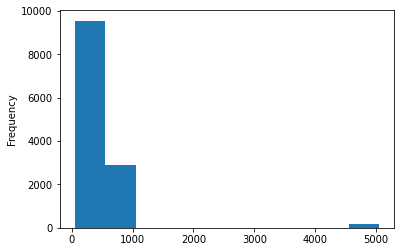

In [164]:
df[var_respuesta].plot(kind="hist")

<AxesSubplot:>

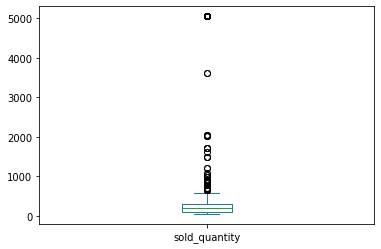

In [165]:
df[var_respuesta].plot(
    kind="box"
)

In [166]:
pd.DataFrame(
    df[var_respuesta].value_counts()
).sort_values(
    by=["sold_quantity"],
    
)

,sold_quantity
1625,1
1075,1
475,1
425,1
775,1
700,2
575,2
1225,2
1025,2
675,2


In [176]:
df["prueba"] = df[var_respuesta].map(
    lambda x : 350 if x >= 350 else x
)

df["prueba"] = df["prueba"].map(
    lambda x : 225 if x == 200 else x
)

df["prueba"] = df["prueba"].map(
    lambda x : 175 if x == 150 else x
)

df["prueba"] = df["prueba"].map(
    lambda x : 125 if x == 100 else x
)

df["prueba"] = df["prueba"].map(
    lambda x : 350 if x == 325 else x
)

df["prueba"] = df["prueba"].map(
    lambda x : 300 if x == 275 else x
)

<AxesSubplot:ylabel='Frequency'>

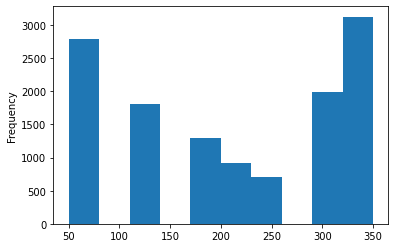

In [177]:
df["prueba"].plot(kind="hist")

<AxesSubplot:>

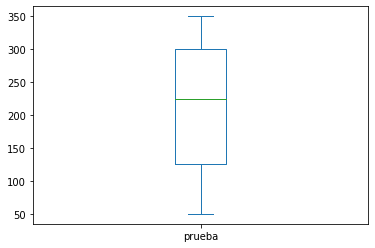

In [178]:
df["prueba"].plot(
    kind="box"
)

In [179]:
pd.DataFrame(
    df["prueba"].value_counts()
).sort_values(
    by=["prueba"],
    
)

,prueba
250,702
225,916
175,1291
75,1295
50,1500
125,1802
300,1992
350,3125


In [181]:
df[var_respuesta] = df["prueba"]

df.drop(
    columns = ["prueba"],
    inplace=True
)

In [182]:
df.isnull().sum()

price                          0
available_quantity             0
sold_quantity                  0
order_backend                  0
installments_quantity          0
installments_amount            0
address_state_name             0
shipping_free_shipping         0
shipping_mode                  0
shipping_logistic_type         0
seller_address_country_name    0
seller_address_state_name      0
NUM_ATTRIBUTEs                 0
ITEM_CONDITION                 0
num_tags                       0
best_seller_candidate          0
loyalty_discount_eligible      0
good_quality_picture           0
tiene_descuento                0
MODEL_bool                     0
BRAND_bool                     0
num_words_tittle               0
num_ints_tittle                0
num_letters_tittle             0
dtype: int64

In [183]:
from sklearn.model_selection import train_test_split
import seaborn as sn
from matplotlib.colors import LogNorm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Separación variable de respuesta y dataset

In [184]:
dataset = df
response_variable = dataset[var_respuesta]
dataset = dataset.drop(
    columns=[var_respuesta], 
    axis=1
)

In [185]:
response_variable

0        300
1        125
2         75
3        300
4        175
        ... 
12820    350
12821    350
12822    350
12823    350
12824    125
Name: sold_quantity, Length: 12623, dtype: int64

# Obtener dummies y crear train y test set

In [224]:
dataset = pd.get_dummies(
    data = dataset, 
    drop_first=True
)

dataset_train, dataset_test, response_train, response_test = train_test_split(
    dataset, 
    response_variable,
    random_state=0
)

# Pipeline

In [225]:
process = make_pipeline(
    StandardScaler(), 
    GradientBoostingClassifier(
        n_estimators=100,
        verbose=1,
        max_depth=5
    )
)

# Training

In [226]:
process.fit(
    dataset_train,
    response_train
)

      Iter       Train Loss   Remaining Time 
         1           1.9370           38.07s
         2           1.9027           37.59s
         3           1.8733           37.16s
         4           1.8473           36.37s
         5           1.8260           35.93s
         6           1.8047           35.48s
         7           1.7861           35.28s
         8           1.7693           34.58s
         9           1.7531           34.00s
        10           1.7360           33.42s
        20           1.6151           28.89s
        30           1.5299           25.01s
        40           1.4651           21.23s
        50           1.4103           17.64s
        60           1.3661           14.15s
        70           1.3249           10.62s
        80           1.2858            7.08s
        90           1.2488            3.54s
       100           1.2113            0.00s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=5, verbose=1))])

# Predict

In [227]:
test_predict = process.predict(
    dataset_test
)

train_predict = process.predict(
    dataset_train
)

In [228]:
labels = list(set(response_variable))

# Arreglo de ROC AUC SCORE, Siguentes 3 celdas borrar si es posible

In [229]:
test_labels = np.unique(test_predict)
train_labels = np.unique(train_predict)

In [230]:
for label in labels:
    if label not in test_labels:
        test_predict = np.append(test_predict,label)
        response_test = np.append(response_test,label)

In [231]:
for label in labels:
    if label not in train_labels:
        train_predict = np.append(train_predict,label)
        response_train = np.append(response_train,label)

# Scores test set

In [232]:
response_test

12319    225
343      125
6938      50
7520     300
4024      50
        ... 
7525     350
5470     350
181      250
9260     250
10559    300
Name: sold_quantity, Length: 3156, dtype: int64

In [233]:
scores = {
    'Medida de desempeño': [
        'F1-Score (Balanceado)',
        'Precision (Balanceado)',
        'Recall (Balanceado)','ROC AUC (Balanceado)'
    ], 
    'Valor': [
        f1_score(
            response_test, 
            test_predict, 
            average = 'weighted'
        ),
        precision_score(
            response_test, 
            test_predict, 
            average = 'weighted'
        ),
        recall_score(
            response_test, 
            test_predict, 
            average = 'weighted'
        ),
        roc_auc_score(
            pd.get_dummies(
                response_test,
                drop_first=False
            ),
            pd.get_dummies(
                test_predict, 
                drop_first=False
            ),
            average = 'weighted'
        )
    ]
}

pd.DataFrame.from_dict(scores)

,Medida de desempeño,Valor
0,F1-Score (Balanceado),0.390087
1,Precision (Balanceado),0.420476
2,Recall (Balanceado),0.422053
3,ROC AUC (Balanceado),0.648560


# Scores train set

In [234]:
scores = {
    'Medida de desempeño': 
    [
        'F1-Score (Balanceado)',
        'Precision (Balanceado)',
        'Recall (Balanceado)',
        'ROC AUC (Balanceado)'
    ],
    'Valor':[
        f1_score(
            response_train, 
            train_predict, 
            average = 'weighted'
        ),
        precision_score(
            response_train, 
            train_predict, 
            average = 'weighted'
        ),
        recall_score(
            response_train, 
            train_predict, 
            average = 'weighted'
        ),
        roc_auc_score(
            pd.get_dummies(
                response_train, 
                drop_first=False
            ), 
            pd.get_dummies(
                train_predict, 
                drop_first=False
            ),average = 'weighted'
        )
    ]
}

pd.DataFrame.from_dict(scores)

,Medida de desempeño,Valor
0,F1-Score (Balanceado),0.626791
1,Precision (Balanceado),0.683709
2,Recall (Balanceado),0.633147
3,ROC AUC (Balanceado),0.775028


# Curva ROC test

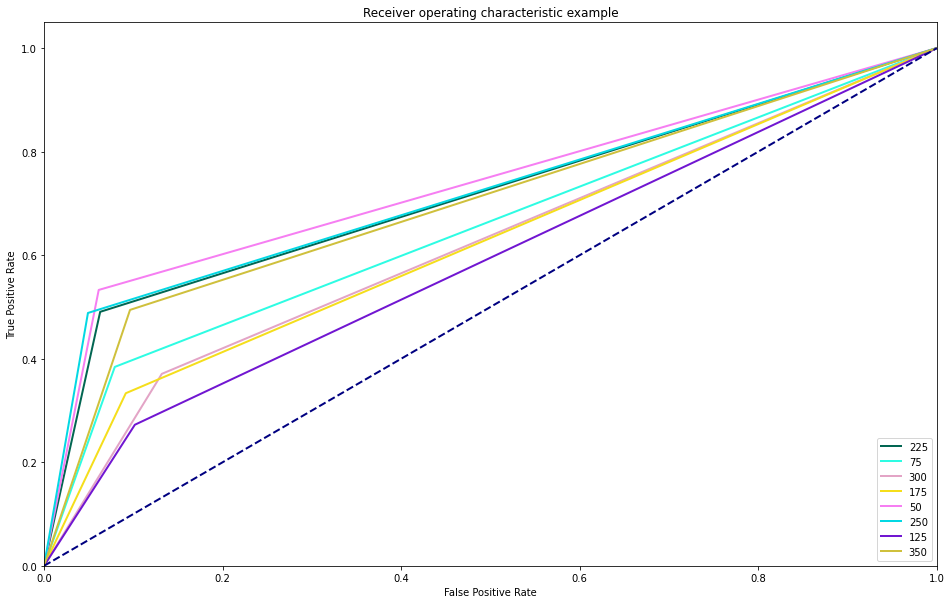

In [235]:
roc_auc_score(pd.get_dummies(response_test, drop_first=False), 
              pd.get_dummies(test_predict, drop_first=False),average = 'weighted')
fpr = {}
tpr = {}
for label in labels:
    prueba_prediccion = test_predict == label
    prueba_resultados = response_test == label 
    roc = roc_curve(prueba_prediccion,prueba_resultados)
    fpr[label] = roc[0]
    tpr[label] = roc[1]
plt.figure(figsize=(16, 10))
for label in labels:
    plt.plot(fpr[label], tpr[label], color=np.random.rand(3,),
             lw=2, label=label)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Curva ROC Train

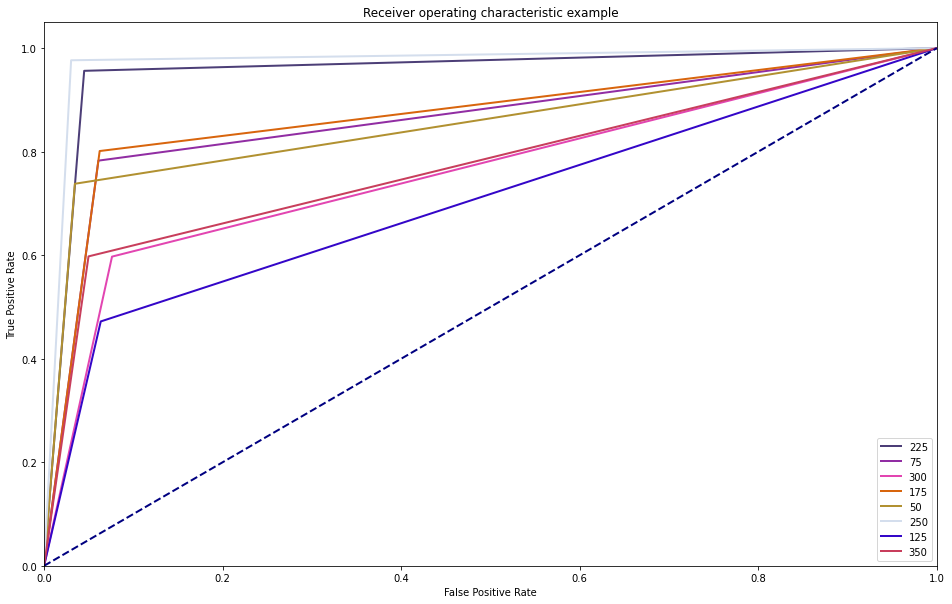

In [236]:
roc_auc_score(pd.get_dummies(response_train, drop_first=False), 
              pd.get_dummies(train_predict, drop_first=False),average = 'weighted')
fpr = {}
tpr = {}
for label in labels:
    prueba_prediccion = train_predict == label
    prueba_resultados = response_train == label 
    roc = roc_curve(prueba_prediccion,prueba_resultados)
    fpr[label] = roc[0]
    tpr[label] = roc[1]
plt.figure(figsize=(16, 10))
for label in labels:
    plt.plot(fpr[label], tpr[label], color=np.random.rand(3,),
             lw=2, label=label)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Matriz de confusión test

<AxesSubplot:>

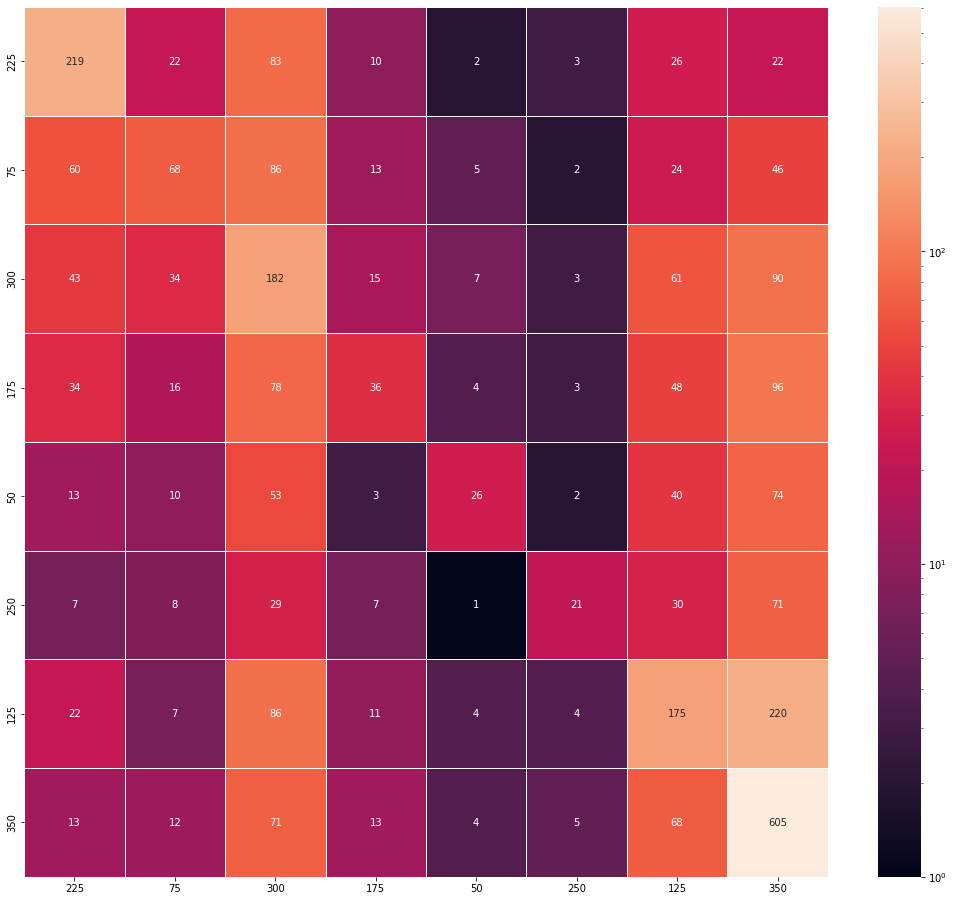

In [237]:
# Fila valor real  columna valor predicho
df_cm = pd.DataFrame(
    confusion_matrix(
        response_test,
        test_predict
    ), 
    index = [i for i in labels],
    columns = [i for i in labels]
)

plt.figure(figsize = (18,16))

sn.heatmap(
    df_cm, 
    annot=True,
    norm=LogNorm(),
    fmt="d",
    linewidths=.5
)

# Matriz de confusión test

<AxesSubplot:>

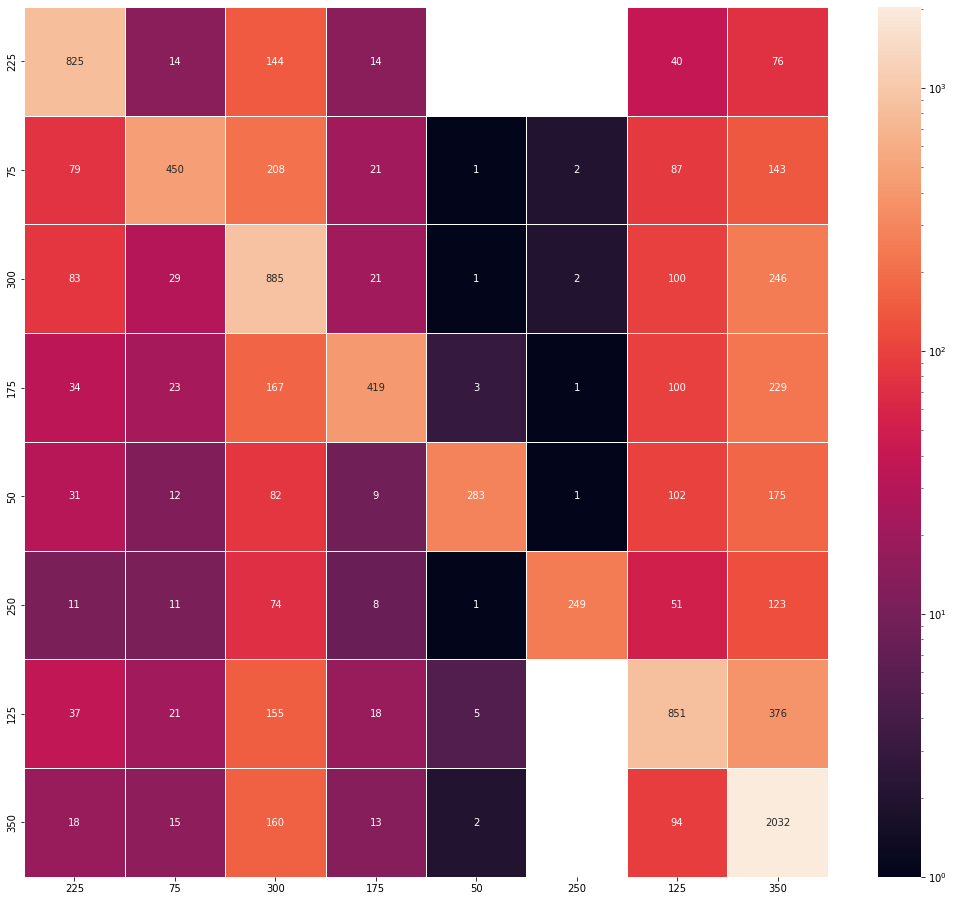

In [238]:
df_cm = pd.DataFrame(
    confusion_matrix(
        response_train,
        train_predict
    ),
    index = [i for i in labels],
    columns = [i for i in labels]
)

plt.figure(figsize = (18,16))

sn.heatmap(
    df_cm, 
    annot=True,
    norm=LogNorm(),
    fmt="d",
    linewidths=.5
)